In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
histData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_NasarBasha/csv_files/historical_data.csv')
FGData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_NasarBasha/csv_files/fear_greed_index.csv')


# EDA


## Data Preprocessing

In [ ]:
histData.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
FGData.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
histData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
FGData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:

histData['Timestamp IST'] = pd.to_datetime(histData['Timestamp IST'], format='%d-%m-%Y %H:%M')
histData['Timestamp IST']

numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
for col in numeric_cols:
    histData[col] = pd.to_numeric(histData[col], errors='coerce')

cols_to_drop = ['Transaction Hash', 'Order ID', 'Trade ID', 'Direction', 'Crossed']
histData = histData.drop(columns=cols_to_drop)

histData['date'] = histData['Timestamp IST'].dt.date
histData['date'] = pd.to_datetime(histData['date'])


In [ ]:
histData.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Closed PnL', 'Fee', 'Timestamp',
       'date'],
      dtype='object')

In [ ]:
FGData=FGData.drop(['timestamp'],axis=1)
FGData['date'] = pd.to_datetime(FGData['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             211224 non-null  object        
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  object        
 6   Timestamp IST    211224 non-null  datetime64[ns]
 7   Start Position   211224 non-null  float64       
 8   Closed PnL       211224 non-null  float64       
 9   Fee              211224 non-null  float64       
 10  Timestamp        211224 non-null  float64       
 11  date             211224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 19.3+ MB


In [ ]:
histData['Timestamp'] = pd.to_datetime(histData['Timestamp'], unit='ms')
histData.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,0.0,0.345404,2024-10-27 03:33:20,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,0.0,0.005600,2024-10-27 03:33:20,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,0.0,0.050431,2024-10-27 03:33:20,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,0.0,0.050043,2024-10-27 03:33:20,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,0.0,0.003055,2024-10-27 03:33:20,2024-12-02


<Axes: xlabel='hour'>

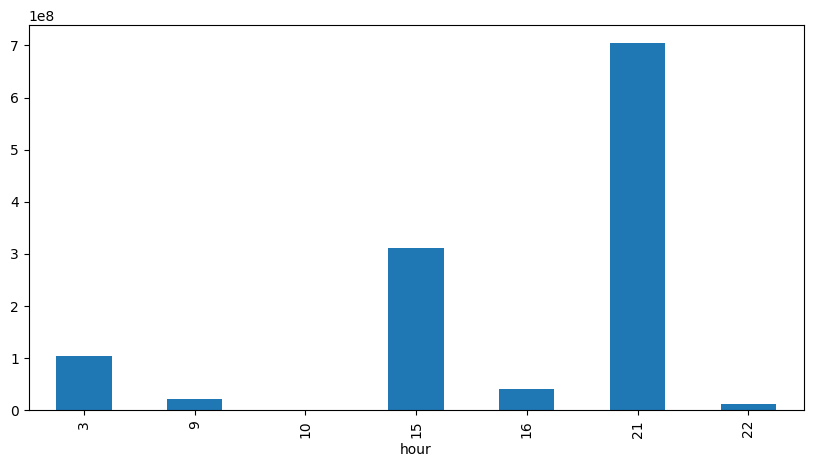

In [ ]:
histData['hour'] = histData['Timestamp'].dt.hour
hourly_volume = histData.groupby('hour')['Size USD'].sum()
hourly_volume.plot(kind='bar', figsize=(10,5))


In [ ]:
mergedData=histData.merge(FGData,on='date',how='left')
mergedData.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee,Timestamp,date,hour,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,0.0,0.345404,2024-10-27 03:33:20,2024-12-02,3,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,0.0,0.005600,2024-10-27 03:33:20,2024-12-02,3,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,0.0,0.050431,2024-10-27 03:33:20,2024-12-02,3,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,0.0,0.050043,2024-10-27 03:33:20,2024-12-02,3,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,0.0,0.003055,2024-10-27 03:33:20,2024-12-02,3,80.0,Extreme Greed


In [ ]:
for col in histData.columns:
  print("===========================",col)
  print(
  histData[col].value_counts()
  )

=========================== Account
Account
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864    21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    15605
0x8477e447846c758f5a675856001ea72298fd9cb5    14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     8519
0x4f93fead39b70a1824f981a54d4e55b278e9f760     7584
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0xb899e522b5715391ae1d4f137653e7906c5e2115     4838
0x8170715b3b381dffb7062c0298972d4727a0a63b     4601
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     4356
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x271b280974205ca63b716753467d5a371de622ab     3809
0x39cef799f8b69da1995852eea189df24eb5cae3c     3589
0x2c229d22b100a7beb69122eed721cee9b24011dd     3239
0x92f17e8d81a944691c

In [ ]:
daily_pnl = mergedData.groupby(['date', 'classification'])['Closed PnL'].sum().reset_index()
daily_volume = mergedData.groupby(['date', 'classification'])['Size USD'].sum().reset_index()


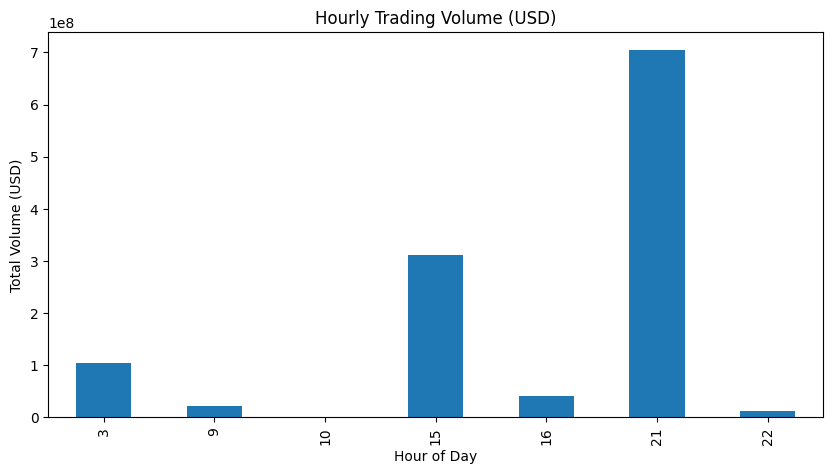

In [87]:
plt.figure(figsize=(10,5))
hourly_volume = mergedData.groupby('hour')['Size USD'].sum()
hourly_volume.plot(kind='bar')
plt.title("Hourly Trading Volume (USD)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Volume (USD)")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_NasarBasha/outputs/hourly_volume.png')
plt.show()

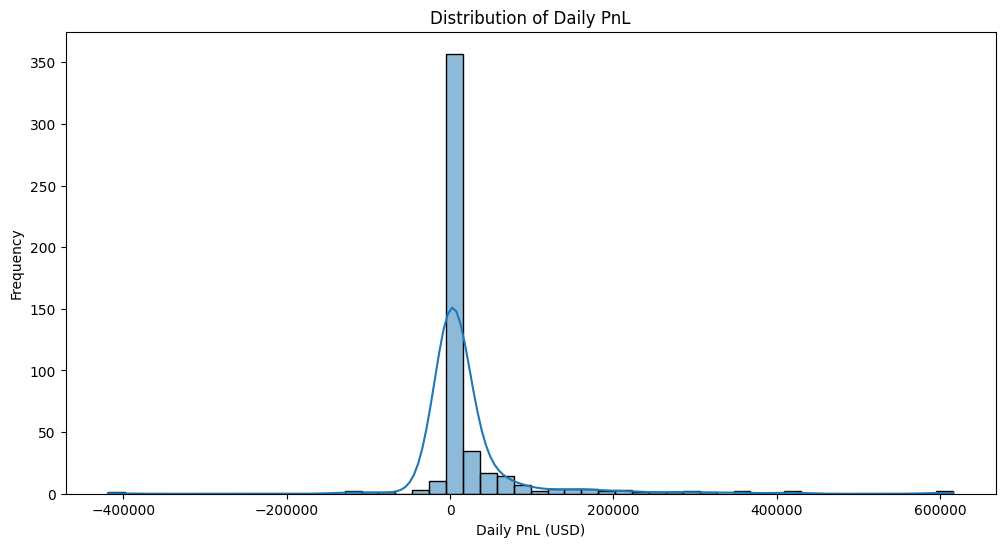

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(daily_pnl['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Daily PnL")
plt.xlabel("Daily PnL (USD)")
plt.ylabel("Frequency")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_NasarBasha/outputs/Daily_distribution.png')
plt.show()

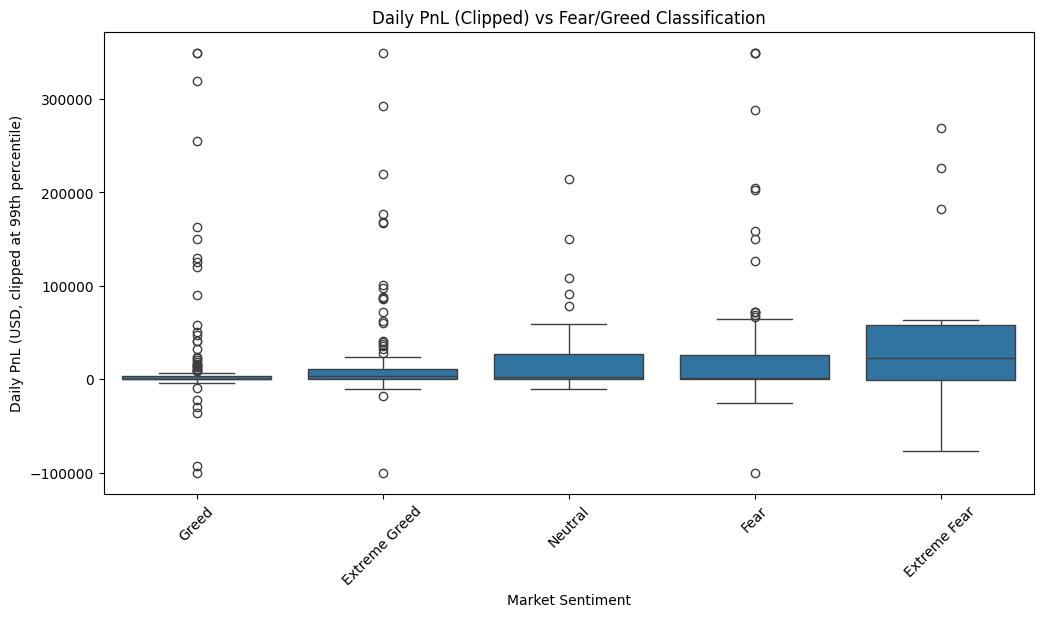

In [81]:
upper_limit = daily_pnl['Closed PnL'].quantile(0.99)
daily_pnl['Closed PnL_clipped'] = daily_pnl['Closed PnL'].clip(lower=-100000,upper=upper_limit)
plt.figure(figsize=(12,6))
sns.boxplot(data=daily_pnl, x='classification', y='Closed PnL_clipped')
plt.title("Daily PnL (Clipped) vs Fear/Greed Classification")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily PnL (USD, clipped at 99th percentile)")
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_NasarBasha/outputs/Daily_PnL.png')
plt.show()


In [78]:
sentiment_stats = daily_pnl.groupby('classification')['Closed PnL_clipped'].agg(
    mean='mean',
    median='median',
    std='std'
).reset_index()

print(sentiment_stats)


  classification          mean        median            std
0   Extreme Fear  52793.589178  22561.739636  101262.394065
1  Extreme Greed  21865.771279   3127.536297   56957.187136
2           Fear  33540.667438   1412.314654   78351.906340
3          Greed  12431.510195    678.475928   52213.322003
4        Neutral  19297.323516   1818.573295   37995.209071


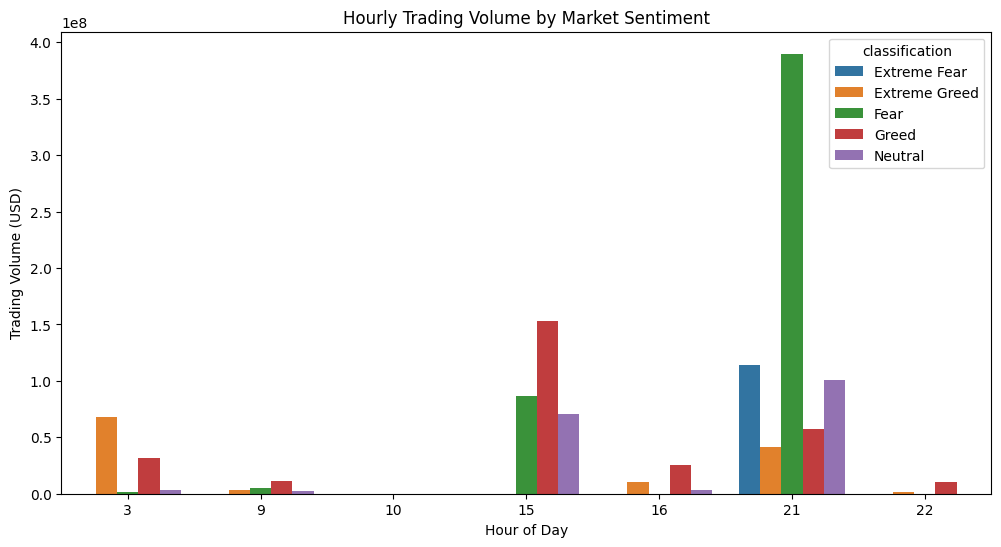

In [82]:
hourly_volume = mergedData.groupby(['hour', 'classification'])['Size USD'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=hourly_volume, x='hour', y='Size USD', hue='classification')
plt.title("Hourly Trading Volume by Market Sentiment")
plt.xlabel("Hour of Day")
plt.ylabel("Trading Volume (USD)")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_NasarBasha/outputs/hourly_volume_By_Market.png')
plt.show()


In [84]:
risk_analysis = mergedData.groupby('classification').agg(
    avg_size=('Size USD', 'mean'),
    avg_fee=('Fee', 'mean'),
    total_trades=('Size USD', 'count')
).reset_index()

print(risk_analysis)


  classification     avg_size   avg_fee  total_trades
0   Extreme Fear  5349.731843  1.116291         21400
1  Extreme Greed  3112.251565  0.675902         39992
2           Fear  7816.109931  1.495172         61837
3          Greed  5736.884375  1.254372         50303
4        Neutral  4782.732661  1.044798         37686


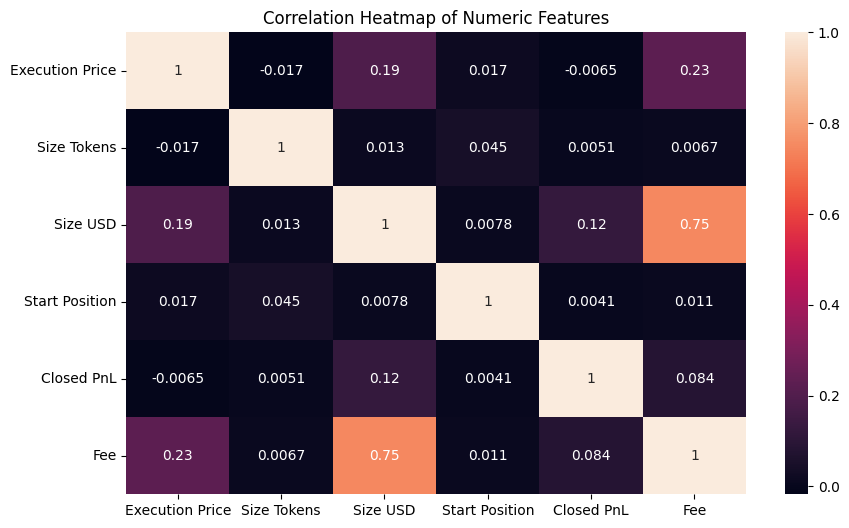

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(mergedData[['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee']].corr(), annot=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
